# Iris Data Predict

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Data 불러오기
path = 'https://raw.githubusercontent.com/blackdew/ml-tensorflow/master/data/csv/iris.csv'
iris = pd.read_csv(path)

iris.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- iris 품종이 target인데 값이 범주형이므로 one-hot-encoding을 해주어야 한다.

In [3]:
iris = pd.get_dummies(iris)
iris.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
independent = iris[iris.columns[:-3]]
dependent = iris[iris.columns[-3:]]

print(independent.shape, dependent.shape)

(150, 4) (150, 3)


In [12]:
X = tf.keras.Input(shape=[4])
Y = tf.keras.layers.Dense(3, activation='softmax')(X)
model = tf.keras.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = model.fit(independent, dependent, epochs=500)

Epoch 1/500


5/5 [==============================] - 0s 2ms/step - loss: 2.0344 - accuracy: 0.5133
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 1.9738 - accuracy: 0.5400
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 1.9313 - accuracy: 0.5400
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 1.8928 - accuracy: 0.5400
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 1.8577 - accuracy: 0.5133
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 1.8234 - accuracy: 0.4800
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 1.7909 - accuracy: 0.4733
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 1.7584 - accuracy: 0.4667
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 1.7266 - accuracy: 0.4533
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 1.6947 - accuracy: 0.4667
Epoch 11/500
5/5 [=======================

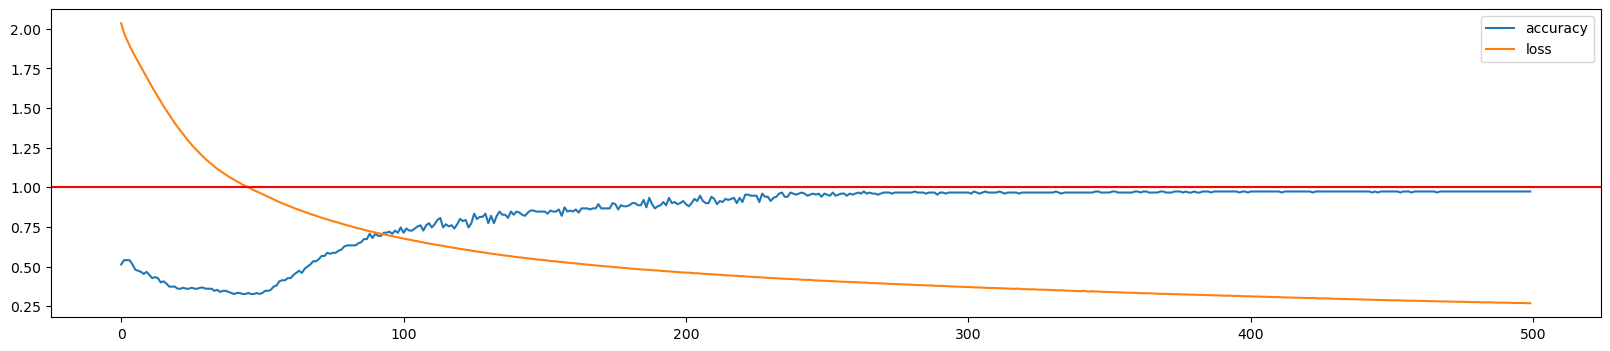

In [16]:
accuracy = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(20, 4))
plt.plot(accuracy, label='accuracy')
plt.plot(loss, label='loss')
plt.axhline(1, color='r')
plt.legend()
plt.show()

In [17]:
model.predict(independent[:5])

1/1 [==============================] - 0s 77ms/step


array([[9.8818141e-01, 1.1747043e-02, 7.1485134e-05],
       [9.6102184e-01, 3.8580637e-02, 3.9756772e-04],
       [9.8319858e-01, 1.6655151e-02, 1.4624320e-04],
       [9.7069371e-01, 2.8960828e-02, 3.4540979e-04],
       [9.9156415e-01, 8.3866566e-03, 4.9176269e-05]], dtype=float32)

In [18]:
dependent[:5]

,품종_setosa,품종_versicolor,품종_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
model.get_weights()

[array([[-0.1845292 ,  0.5081399 ,  0.02080934],
        [ 2.3688416 , -0.34226203, -1.2007835 ],
        [-2.436908  , -0.6160042 ,  0.24224599],
        [-1.6594785 , -0.8930877 ,  0.6258113 ]], dtype=float32),
 array([ 1.3148726 ,  0.13631506, -0.9806712 ], dtype=float32)]

#### Sortmax

In [23]:
import math

x = [5.1, 3.5, 1.4, 0.2]
y = []                                  # y의 결과를 저장하기 위한 리스트 생성
weight = model.get_weights()            # 모델의 가중치

for i in range(3):                      # y값 결과를 for문으로 계산
    res = 0
    for j in range(4):
        res += weight[0][j][i] * x[j]

    y.append(res)

ey1 = math.e ** y[0]                    # e^y1
ey2 = math.e ** y[1]                    # e^y2
ey3 = math.e ** y[2]                    # e^y3

py1 = ey1 / (ey1 + ey2 + ey3)           # py1
py2 = ey2 / (ey1 + ey2 + ey3)           # py2
py3 = ey3 / (ey1 + ey2 + ey3)           # py3

print(py1, py2, py3)                    # 0.9621406644728456 0.03716820544350335 0.0006911300836511623
                                        # setosa일 확률이 0.96으로 setosa로 분류됨

0.9621406644728456 0.03716820544350335 0.0006911300836511623


#### [가정] 품종이 2 class 일 때
1. 품종을 0, 1의 값으로 치환
    - 종속변수가 1개
    - sigmoid, binary_crossentropy 사용
2. 품종을 onehot encoding => [0칼럼, 1칼럼]
    - 종속변수 2개
    - softmax, categorical_crossentropy 사용

#### 저장 & 로딩

In [25]:
# 저장
model.save("my_model.keras")
# 로딩
mymodel = tf.keras.models.load_model("my_model.keras")
# 모델을 이용
mymodel.predict(independent[:5])

1/1 [==============================] - 0s 181ms/step


array([[9.8818141e-01, 1.1747043e-02, 7.1485134e-05],
       [9.6102184e-01, 3.8580637e-02, 3.9756772e-04],
       [9.8319858e-01, 1.6655151e-02, 1.4624320e-04],
       [9.7069371e-01, 2.8960828e-02, 3.4540979e-04],
       [9.9156415e-01, 8.3866566e-03, 4.9176269e-05]], dtype=float32)